# Experimentos de optimización: $f(x,y)=y^2 + \log(1+x^2)$

**Autor:** Alina María de la Noval Armenteros  
**Grupo:** C-311  


**Objetivo:** Aplicar los métodos Descenso por Gradiente con Armijo y BFGS (Cuasi-Newton) a la función $f(x,y)=y^2 + \log(1+x^2)$, comparar su comportamiento en términos de convergencia, número de iteraciones, tiempo y sensibilidad al punto inicial, y documentar conclusiones técnicas.

**Resumen breve:** Esta función combina un término cuadrático en $y$ con un término logarítmico en $x$; la diferencia en curvatura entre las direcciones $x$ y $y$ la hace adecuada para comparar la eficacia de métodos de primer y segundo orden.

## Descripción teórica del problema

Función objetivo: $$f(x,y)=y^2 + \log(1+x^2).$$

- Dominio: definida para todo $(x,y)\in\mathbb{R}^2$ ya que $1+x^2>0$ para todo $x$.
- Descomposición: la función se puede escribir como suma de funciones univariadas, $f(x,y)=g(x)+h(y)$ con $g(x)=\log(1+x^2)$ y $h(y)=y^2$. Esto facilita el análisis teórico y numérico.
- Regularidad: ambas componentes son $C^{\infty}$ en el dominio, por lo que $f\in C^{\infty}(\mathbb{R}^2)$; es válido usar métodos que requieran gradiente y aproximaciones de la Hessiana.

**Gradiente:**
$$\nabla f(x,y)=\begin{pmatrix}\dfrac{2x}{1+x^2}\\2y\end{pmatrix}.$$

**Hessiano:**
$$\nabla^2 f(x,y)=\begin{pmatrix}\dfrac{2(1-x^2)}{(1+x^2)^2} & 0\\0 & 2\end{pmatrix}.$$

- Observación sobre convexidad: la componente $(2(1-x^2)/(1+x^2)^2)$ cambia de signo: es positiva para $|x|<1$, cero en $|x|=1$ y negativa para $|x|>1$. Por tanto, el Hessiano no es globalmente semidefinido positivo y la función no es convexa globalmente; sin embargo, localmente alrededor del origen muestra comportamiento convexo.

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
from itertools import product
from optimizacion import gradient_descent_armijo, bfgs
from optimizacion.line_search import backtracking_armijo
from optimizacion.util_json import run_and_save_experiments, load_experiments_from_json
from optimizacion.graficos import plot_convergence, plot_final_vs_iters, plot_trajectory_2d
plt.style.use('seaborn-v0_8-darkgrid')
np.random.seed(0)

In [ ]:
import numpy as np

def f(x):
    """Función objetivo. `x` es array-like [x, y].
    Devuelve escalar f(x).
    """
    x = np.asarray(x)
    xv = float(x[0])
    yv = float(x[1])
    return yv**2 + np.log(1.0 + xv**2)

def grad(x):
    """Gradiente de f: devuelve array [df/dx, df/dy].
    """
    x = np.asarray(x)
    xv = float(x[0])
    yv = float(x[1])
    dfdx = (2.0 * xv) / (1.0 + xv**2)
    dfdy = 2.0 * yv
    return np.array([dfdx, dfdy])



In [ ]:
algorithms = ['gd', 'bfgs']  
points = [np.array([2.0, 1.5]), np.array([0.9,0.0]), np.array([2.5,0.0]), np.array([0.0,2.5]), np.array([-3.0,1.5]), np.array([5.0,-2.0])]

tolerance = 1e-6
maxiter = 500

run_configs = []
for alg in algorithms:
    for x0 in points:
        cfg = {
            'algorithm': alg,
            'x0': x0,
            'tolerance': tolerance,
            'line_search': backtracking_armijo if alg == 'gd' else None,
            'maxiter': maxiter
        }
        run_configs.append(cfg)

In [ ]:
# Mapear nombres a funciones (coincide con 'algorithm' en run_configs)
algorithm_fn_map = {
    'gd': gradient_descent_armijo,
    'bfgs': bfgs
}

# Ejecutar y guardar resultados (guardará en data/resultados/experimentos_grafico.json)
output_file = 'data/resultados/experimentos_grafico.json'
experiment_data = run_and_save_experiments(run_configs, algorithm_fn_map, filename=output_file, f=f, grad=grad)


[Exp 1] algoritmo=gd x0=[2.0, 1.5] tol=1e-06 ls=<function backtracking_armijo at 0x00000280CA362160>

[Exp 2] algoritmo=gd x0=[0.9, 0.0] tol=1e-06 ls=<function backtracking_armijo at 0x00000280CA362160>

[Exp 3] algoritmo=gd x0=[2.5, 0.0] tol=1e-06 ls=<function backtracking_armijo at 0x00000280CA362160>

[Exp 4] algoritmo=gd x0=[0.0, 2.5] tol=1e-06 ls=<function backtracking_armijo at 0x00000280CA362160>

[Exp 5] algoritmo=gd x0=[-3.0, 1.5] tol=1e-06 ls=<function backtracking_armijo at 0x00000280CA362160>

[Exp 6] algoritmo=gd x0=[5.0, -2.0] tol=1e-06 ls=<function backtracking_armijo at 0x00000280CA362160>

[Exp 7] algoritmo=bfgs x0=[2.0, 1.5] tol=1e-06 ls=None

[Exp 8] algoritmo=bfgs x0=[0.9, 0.0] tol=1e-06 ls=None

[Exp 9] algoritmo=bfgs x0=[2.5, 0.0] tol=1e-06 ls=None

[Exp 10] algoritmo=bfgs x0=[0.0, 2.5] tol=1e-06 ls=None

[Exp 11] algoritmo=bfgs x0=[-3.0, 1.5] tol=1e-06 ls=None

[Exp 12] algoritmo=bfgs x0=[5.0, -2.0] tol=1e-06 ls=None
Resultados guardados en: data/resultados/expe

In [ ]:
# Cargar resultados desde JSON para análisis/plotting
data = load_experiments_from_json('data/resultados/experimentos_grafico.json')
experiments = data.get('experiments', [])

Cargado: data/resultados/experimentos_grafico.json
  Metadatos: ['timestamp', 'schema_version', 'python_version', 'numpy_version', 'scipy_version', 'matplotlib_version', 'objective_function', 'algorithms', 'author']
  Número de experimentos: 12


C:\Users\admin\Desktop\código Optimización\mi_proyecto_optimizacion\src\optimizacion\graficos.py:123: UserWarning: Glyph 8711 (\N{NABLA}) missing from font(s) Arial.
  plt.tight_layout(rect=[0, 0, rect_right, 1])
C:\Users\admin\Desktop\código Optimización\mi_proyecto_optimizacion\src\optimizacion\graficos.py:129: UserWarning: Glyph 8711 (\N{NABLA}) missing from font(s) Arial.
  plt.savefig(fname, dpi=300, bbox_inches='tight')


C:\Users\admin\Desktop\código Optimización\mi_proyecto_optimizacion\src\optimizacion\graficos.py:123: UserWarning: Glyph 8711 (\N{NABLA}) missing from font(s) Arial.
  plt.tight_layout(rect=[0, 0, rect_right, 1])
C:\Users\admin\Desktop\código Optimización\mi_proyecto_optimizacion\src\optimizacion\graficos.py:129: UserWarning: Glyph 8711 (\N{NABLA}) missing from font(s) Arial.
  plt.savefig(fname, dpi=300, bbox_inches='tight')


Gráfica guardada: data/resultados/convergencia_gd.png


C:\Users\admin\Desktop\código Optimización\mi_proyecto_optimizacion\src\optimizacion\graficos.py:123: UserWarning: Glyph 8711 (\N{NABLA}) missing from font(s) Arial.
  plt.tight_layout(rect=[0, 0, rect_right, 1])
C:\Users\admin\Desktop\código Optimización\mi_proyecto_optimizacion\src\optimizacion\graficos.py:129: UserWarning: Glyph 8711 (\N{NABLA}) missing from font(s) Arial.
  plt.savefig(fname, dpi=300, bbox_inches='tight')


Gráfica guardada: data/resultados/convergencia_gd.png


C:\Users\admin\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8711 (\N{NABLA}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


C:\Users\admin\Desktop\código Optimización\mi_proyecto_optimizacion\src\optimizacion\graficos.py:123: UserWarning: Glyph 8711 (\N{NABLA}) missing from font(s) Arial.
  plt.tight_layout(rect=[0, 0, rect_right, 1])
C:\Users\admin\Desktop\código Optimización\mi_proyecto_optimizacion\src\optimizacion\graficos.py:129: UserWarning: Glyph 8711 (\N{NABLA}) missing from font(s) Arial.
  plt.savefig(fname, dpi=300, bbox_inches='tight')


Gráfica guardada: data/resultados/convergencia_gd.png


C:\Users\admin\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8711 (\N{NABLA}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


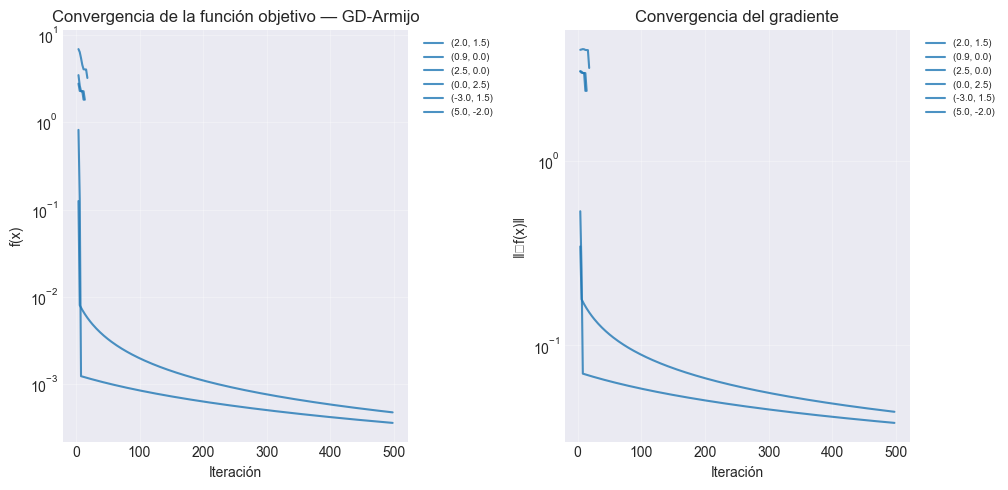

C:\Users\admin\Desktop\código Optimización\mi_proyecto_optimizacion\src\optimizacion\graficos.py:123: UserWarning: Glyph 8711 (\N{NABLA}) missing from font(s) Arial.
  plt.tight_layout(rect=[0, 0, rect_right, 1])
C:\Users\admin\Desktop\código Optimización\mi_proyecto_optimizacion\src\optimizacion\graficos.py:129: UserWarning: Glyph 8711 (\N{NABLA}) missing from font(s) Arial.
  plt.savefig(fname, dpi=300, bbox_inches='tight')


Gráfica guardada: data/resultados/convergencia_gd.png


C:\Users\admin\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8711 (\N{NABLA}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


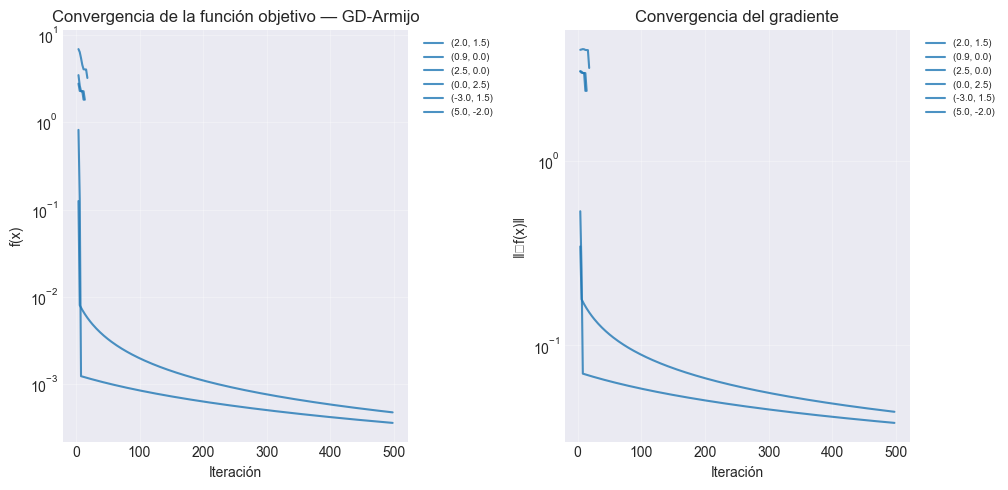

Gráfica guardada: data/resultados/convergencia_bfgs.png


C:\Users\admin\Desktop\código Optimización\mi_proyecto_optimizacion\src\optimizacion\graficos.py:123: UserWarning: Glyph 8711 (\N{NABLA}) missing from font(s) Arial.
  plt.tight_layout(rect=[0, 0, rect_right, 1])
C:\Users\admin\Desktop\código Optimización\mi_proyecto_optimizacion\src\optimizacion\graficos.py:129: UserWarning: Glyph 8711 (\N{NABLA}) missing from font(s) Arial.
  plt.savefig(fname, dpi=300, bbox_inches='tight')


Gráfica guardada: data/resultados/convergencia_gd.png


C:\Users\admin\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8711 (\N{NABLA}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


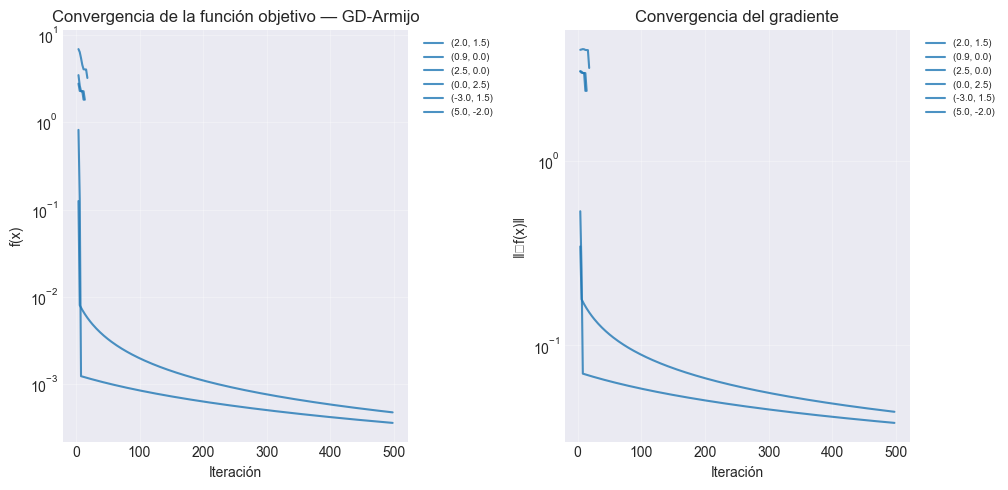

Gráfica guardada: data/resultados/convergencia_bfgs.png


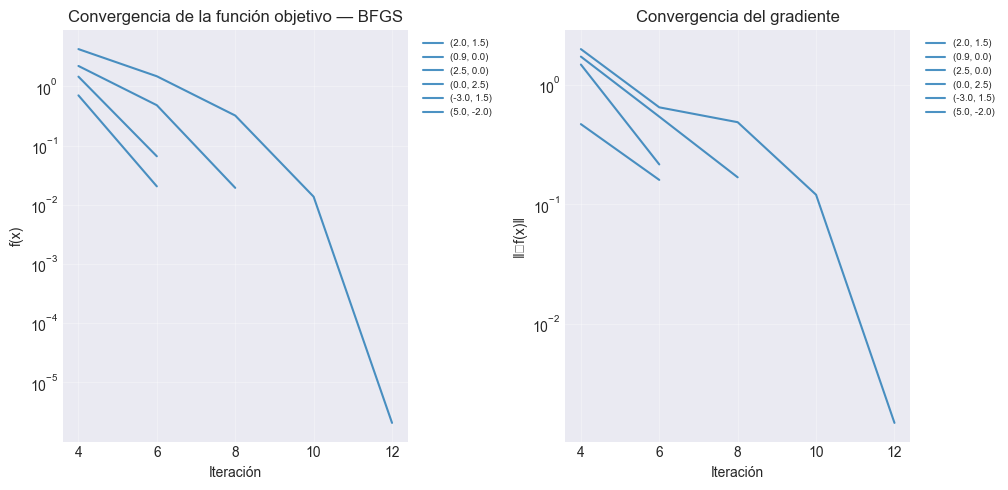

C:\Users\admin\Desktop\código Optimización\mi_proyecto_optimizacion\src\optimizacion\graficos.py:123: UserWarning: Glyph 8711 (\N{NABLA}) missing from font(s) Arial.
  plt.tight_layout(rect=[0, 0, rect_right, 1])
C:\Users\admin\Desktop\código Optimización\mi_proyecto_optimizacion\src\optimizacion\graficos.py:129: UserWarning: Glyph 8711 (\N{NABLA}) missing from font(s) Arial.
  plt.savefig(fname, dpi=300, bbox_inches='tight')


Gráfica guardada: data/resultados/convergencia_gd.png


C:\Users\admin\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8711 (\N{NABLA}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


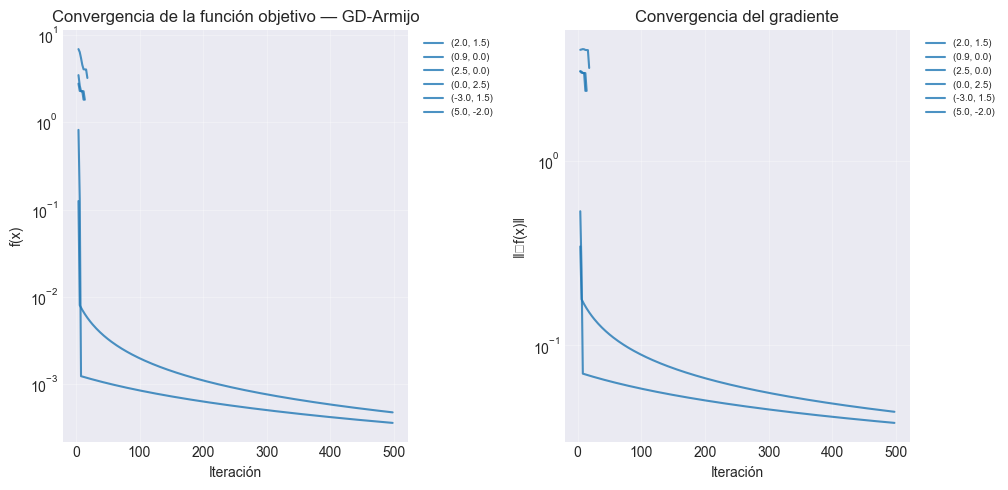

Gráfica guardada: data/resultados/convergencia_bfgs.png


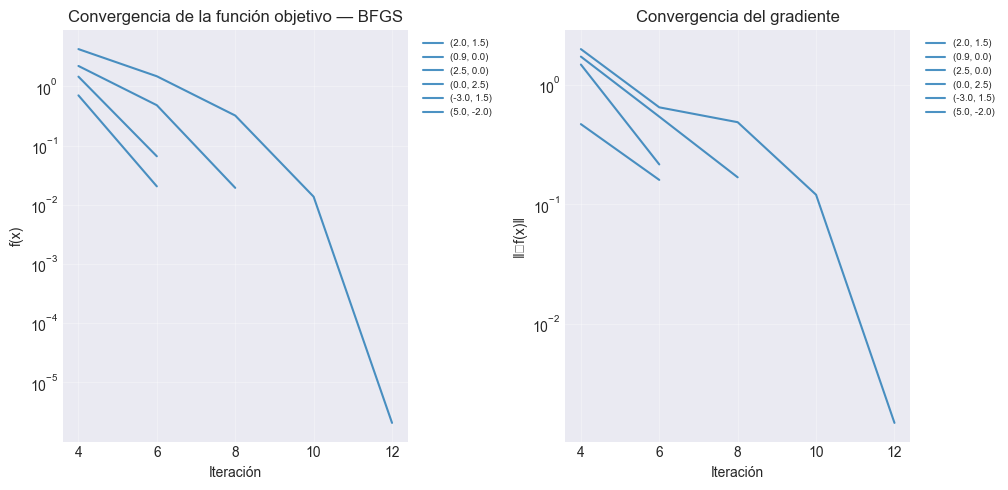

Gráfica guardada: data/resultados/final_vs_iters_gd.png


C:\Users\admin\Desktop\código Optimización\mi_proyecto_optimizacion\src\optimizacion\graficos.py:123: UserWarning: Glyph 8711 (\N{NABLA}) missing from font(s) Arial.
  plt.tight_layout(rect=[0, 0, rect_right, 1])
C:\Users\admin\Desktop\código Optimización\mi_proyecto_optimizacion\src\optimizacion\graficos.py:129: UserWarning: Glyph 8711 (\N{NABLA}) missing from font(s) Arial.
  plt.savefig(fname, dpi=300, bbox_inches='tight')


Gráfica guardada: data/resultados/convergencia_gd.png


C:\Users\admin\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8711 (\N{NABLA}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


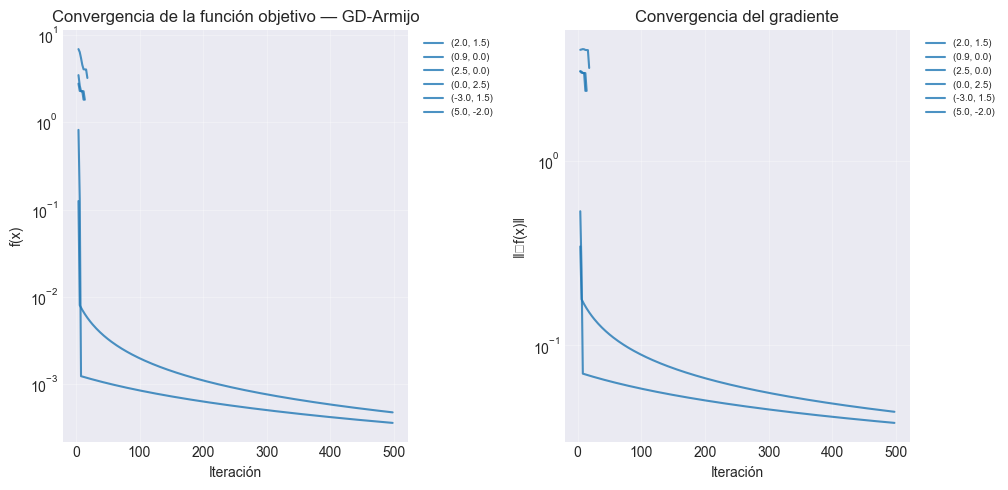

Gráfica guardada: data/resultados/convergencia_bfgs.png


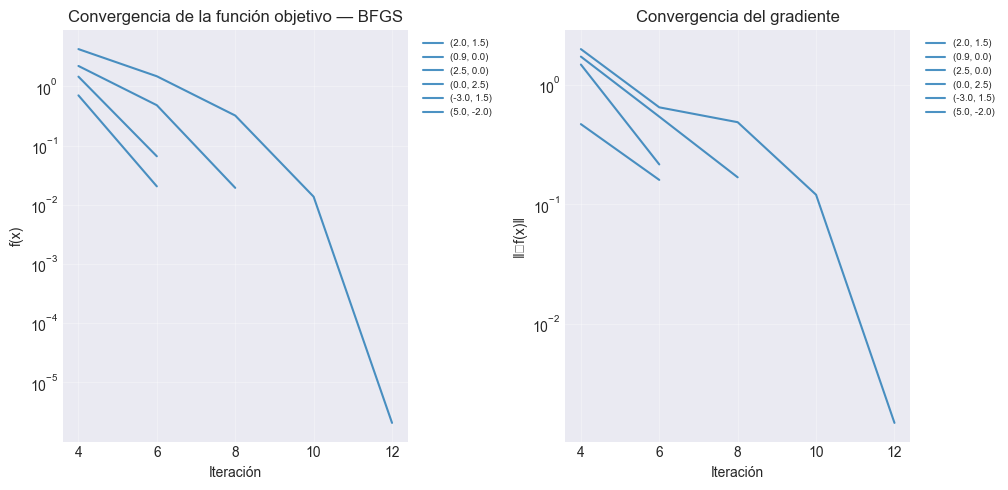

Gráfica guardada: data/resultados/final_vs_iters_gd.png


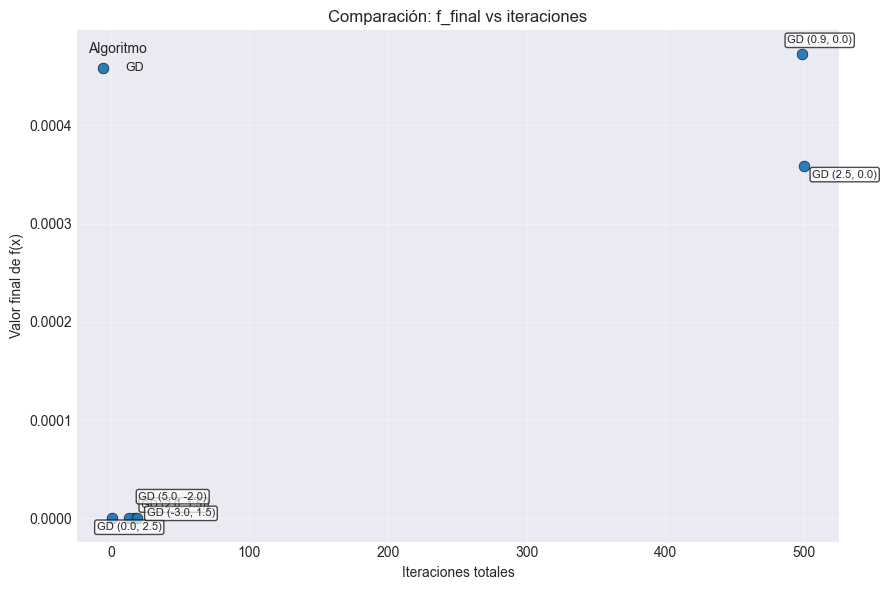

C:\Users\admin\Desktop\código Optimización\mi_proyecto_optimizacion\src\optimizacion\graficos.py:123: UserWarning: Glyph 8711 (\N{NABLA}) missing from font(s) Arial.
  plt.tight_layout(rect=[0, 0, rect_right, 1])
C:\Users\admin\Desktop\código Optimización\mi_proyecto_optimizacion\src\optimizacion\graficos.py:129: UserWarning: Glyph 8711 (\N{NABLA}) missing from font(s) Arial.
  plt.savefig(fname, dpi=300, bbox_inches='tight')


Gráfica guardada: data/resultados/convergencia_gd.png


C:\Users\admin\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8711 (\N{NABLA}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


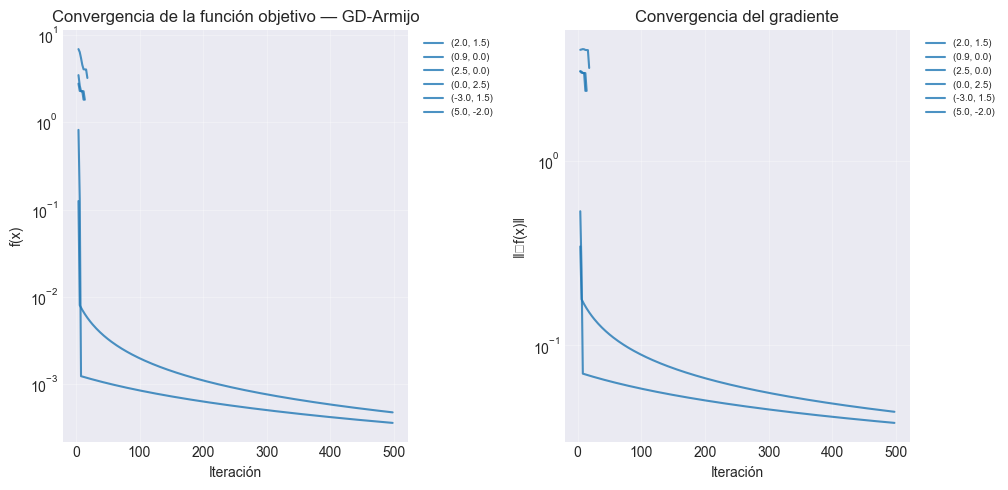

Gráfica guardada: data/resultados/convergencia_bfgs.png


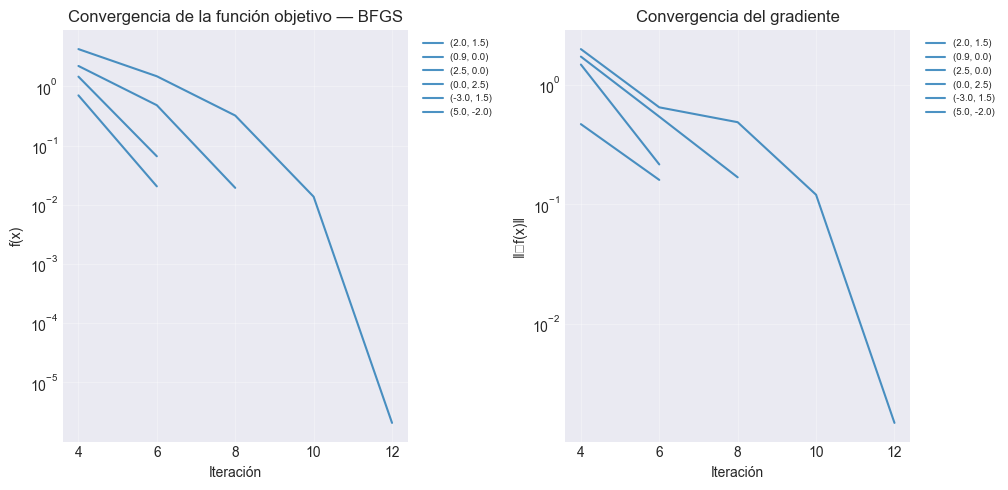

Gráfica guardada: data/resultados/final_vs_iters_gd.png


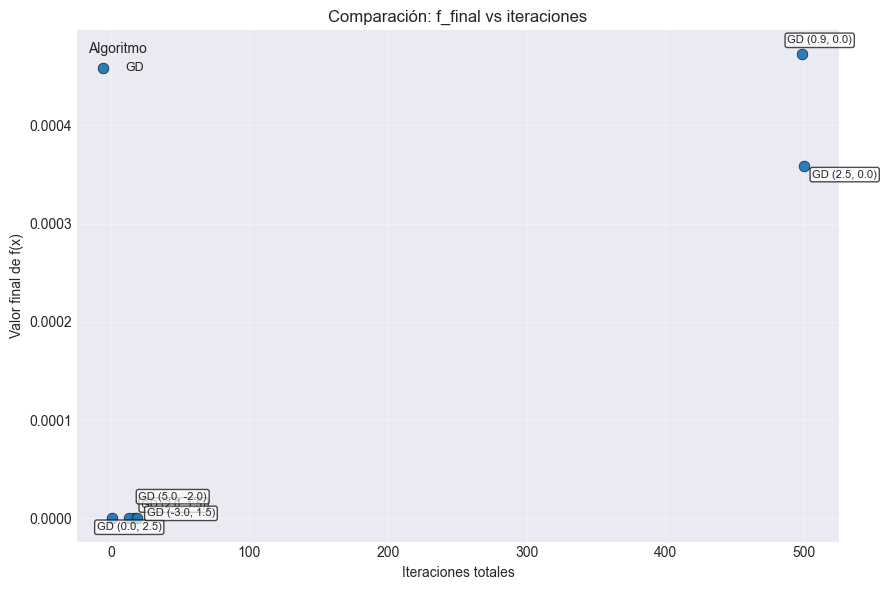

Gráfica guardada: data/resultados/final_vs_iters_bfgs.png


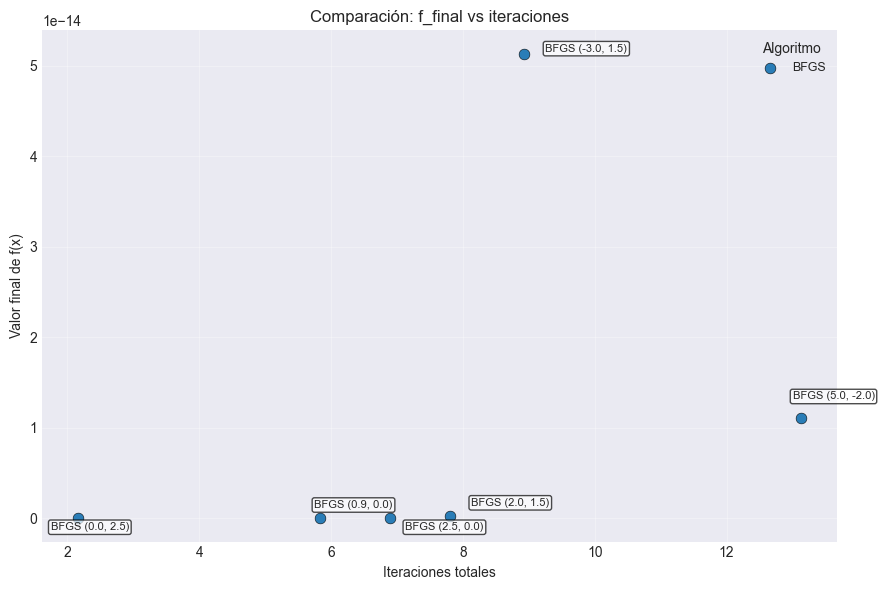

C:\Users\admin\Desktop\código Optimización\mi_proyecto_optimizacion\src\optimizacion\graficos.py:123: UserWarning: Glyph 8711 (\N{NABLA}) missing from font(s) Arial.
  plt.tight_layout(rect=[0, 0, rect_right, 1])
C:\Users\admin\Desktop\código Optimización\mi_proyecto_optimizacion\src\optimizacion\graficos.py:129: UserWarning: Glyph 8711 (\N{NABLA}) missing from font(s) Arial.
  plt.savefig(fname, dpi=300, bbox_inches='tight')


Gráfica guardada: data/resultados/convergencia_gd.png


C:\Users\admin\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8711 (\N{NABLA}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


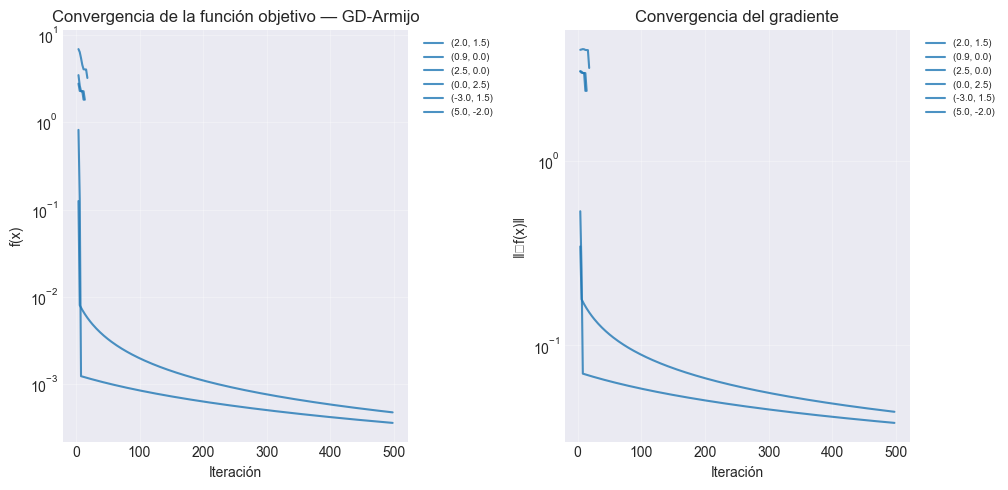

Gráfica guardada: data/resultados/convergencia_bfgs.png


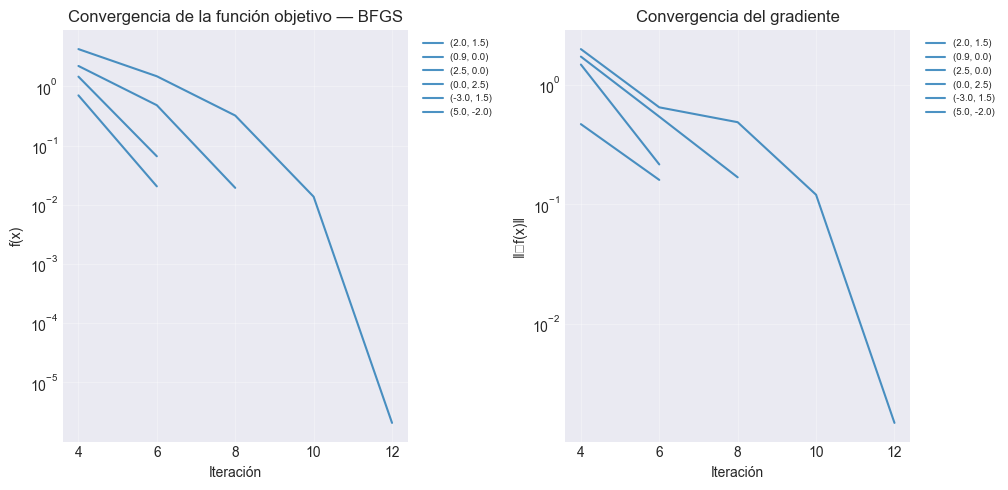

Gráfica guardada: data/resultados/final_vs_iters_gd.png


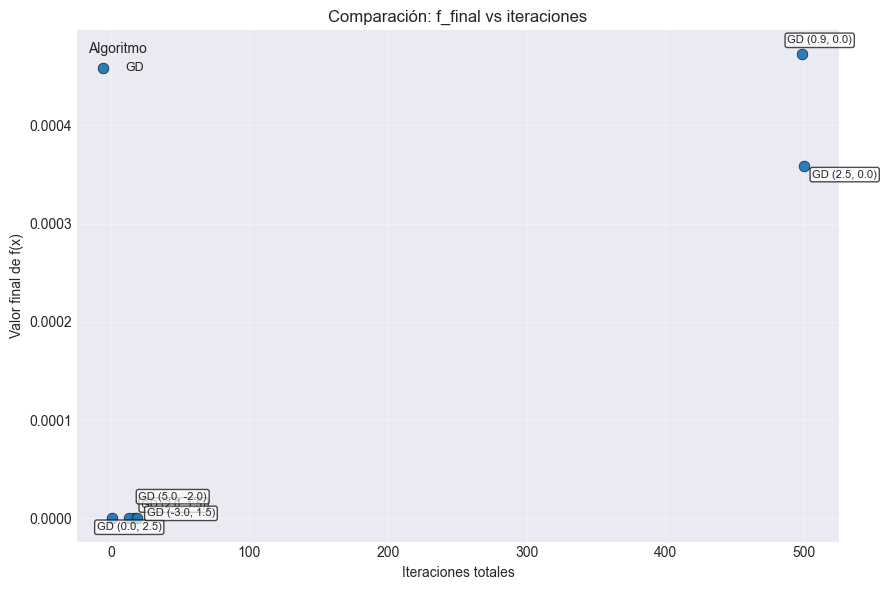

Gráfica guardada: data/resultados/final_vs_iters_bfgs.png


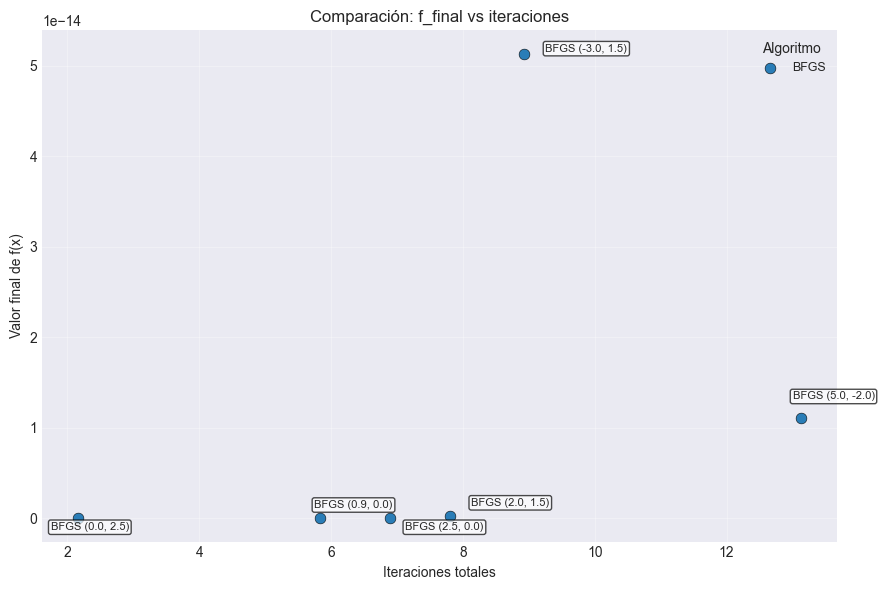

Gráfica guardada: data/resultados/trayectoria_exp1.png


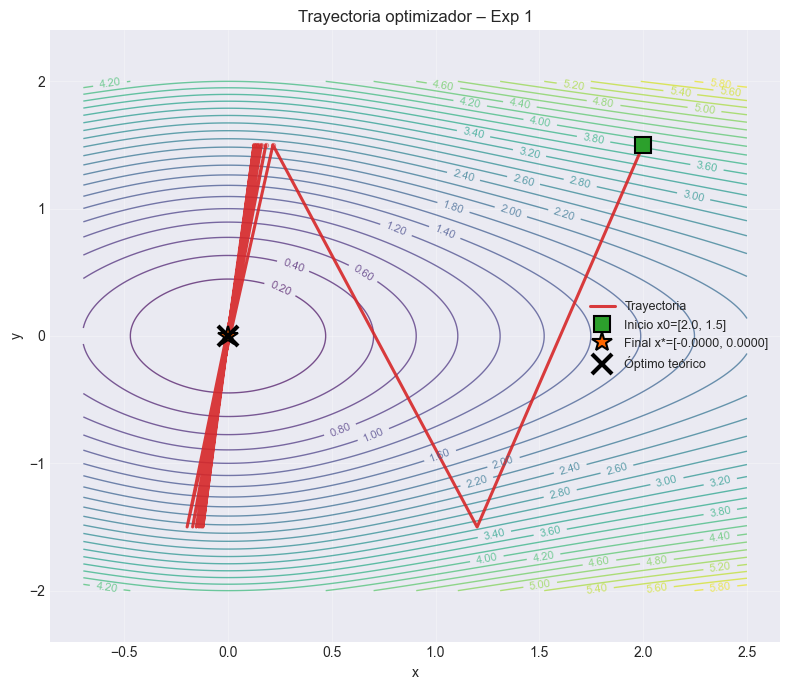

In [ ]:
# Graficación: convergencia, comparación y trayectorias individuales
import os
os.makedirs('data/resultados', exist_ok=True)
plot_convergence(experiments, filename='data/resultados/convergencia.png', group_by='algorithm', smooth_window=5, decimate=2, legend_outside=True, legend_fontsize='x-small', compact_labels=True)
plot_final_vs_iters(experiments, filename='data/resultados/final_vs_iters.png', group_by='algorithm')
if experiments:
    exp0 = experiments[0]
    plot_trajectory_2d(exp0, filename='data/resultados/trayectoria_exp1.png')

In [ ]:
# Generación estratificada de puntos iniciales para análisis comparativo

# Estrategia 1: Malla densa en región central [-3, 3]²
x_dense = np.linspace(-3, 3, 25)
y_dense = np.linspace(-3, 3, 25)
points_dense = np.array([[x, y] for x, y in product(x_dense, y_dense)])

# Estrategia 2: Malla espaciada en región exterior [-8, 8]²
x_sparse = np.linspace(-8, 8, 15)
y_sparse = np.linspace(-8, 8, 15)
points_sparse = np.array([[x, y] for x, y in product(x_sparse, y_sparse) 
                          if abs(x) > 3 or abs(y) > 3])

# Estrategia 3: Muestreo aleatorio uniforme en [-10, 10]²
np.random.seed(42)
points_random = np.random.uniform(-10, 10, size=(100, 2))

# Estrategia 4: Sobremuestreo en vecindad del mínimo [-1, 1]²
points_near_opt = np.random.uniform(-1, 1, size=(50, 2))

# Consolidación del conjunto completo
all_points = np.vstack([points_dense, points_sparse, points_random, points_near_opt])

In [ ]:
# Configuración de experimentos para análisis comparativo

algorithms_comp = ['gd', 'bfgs']
tolerance_comp = 1e-6
maxiter_comp = 500

# Construcción de configuraciones de experimentos
run_configs_comparison = []
for alg in algorithms_comp:
    for x0 in all_points:
        cfg = {
            'algorithm': alg,
            'x0': x0,
            'tolerance': tolerance_comp,
            'line_search': backtracking_armijo if alg == 'gd' else None,
            'maxiter': maxiter_comp
        }
        run_configs_comparison.append(cfg)

In [ ]:
# Ejecución de experimentos con análisis comparativo
output_file_comparison = 'data/resultados/experimentos_comparacion.json'
experiment_data_comparison = run_and_save_experiments(
    run_configs_comparison, 
    algorithm_fn_map, 
    filename=output_file_comparison, 
    f=f, 
    grad=grad
)


[Exp 1] algoritmo=gd x0=[-3.0, -3.0] tol=1e-06 ls=<function backtracking_armijo at 0x00000280CA362160>

[Exp 2] algoritmo=gd x0=[-3.0, -2.75] tol=1e-06 ls=<function backtracking_armijo at 0x00000280CA362160>

[Exp 3] algoritmo=gd x0=[-3.0, -2.5] tol=1e-06 ls=<function backtracking_armijo at 0x00000280CA362160>

[Exp 4] algoritmo=gd x0=[-3.0, -2.25] tol=1e-06 ls=<function backtracking_armijo at 0x00000280CA362160>

[Exp 5] algoritmo=gd x0=[-3.0, -2.0] tol=1e-06 ls=<function backtracking_armijo at 0x00000280CA362160>

[Exp 6] algoritmo=gd x0=[-3.0, -1.75] tol=1e-06 ls=<function backtracking_armijo at 0x00000280CA362160>

[Exp 7] algoritmo=gd x0=[-3.0, -1.5] tol=1e-06 ls=<function backtracking_armijo at 0x00000280CA362160>

[Exp 8] algoritmo=gd x0=[-3.0, -1.25] tol=1e-06 ls=<function backtracking_armijo at 0x00000280CA362160>

[Exp 9] algoritmo=gd x0=[-3.0, -1.0] tol=1e-06 ls=<function backtracking_armijo at 0x00000280CA362160>

[Exp 10] algoritmo=gd x0=[-3.0, -0.75] tol=1e-06 ls=<functi

In [ ]:
# Carga de resultados desde JSON
data_comparison = load_experiments_from_json('data/resultados/experimentos_comparacion.json')
experiments_comparison = data_comparison.get('experiments', [])

# Separación por algoritmo
gd_experiments = [exp for exp in experiments_comparison if exp['parameters']['algorithm'] == 'gd']
bfgs_experiments = [exp for exp in experiments_comparison if exp['parameters']['algorithm'] == 'bfgs']

# Extracción de métricas
def extract_metrics(experiments):
    iters = []
    converged = []
    final_f = []
    final_grad_norm = []
    
    for exp in experiments:
        res = exp['results']
        iters.append(res['iterations'])
        converged.append(res['iterations'] < maxiter_comp)
        final_f.append(res['f_final'])
        final_grad_norm.append(res['grad_norm_final'])
    
    return {
        'iterations': np.array(iters),
        'converged': np.array(converged),
        'final_f': np.array(final_f),
        'final_grad_norm': np.array(final_grad_norm)
    }

gd_metrics = extract_metrics(gd_experiments)
bfgs_metrics = extract_metrics(bfgs_experiments)

Cargado: data/resultados/experimentos_comparacion.json
  Metadatos: ['timestamp', 'schema_version', 'python_version', 'numpy_version', 'scipy_version', 'matplotlib_version', 'objective_function', 'algorithms', 'author']
  Número de experimentos: 1950


In [ ]:
# Filtrar casos convergentes
gd_iters_conv = gd_metrics['iterations'][gd_metrics['converged']]
bfgs_iters_conv = bfgs_metrics['iterations'][bfgs_metrics['converged']]

# Tasas de convergencia
gd_conv_rate = np.mean(gd_metrics['converged']) * 100
bfgs_conv_rate = np.mean(bfgs_metrics['converged']) * 100

# Construcción de DataFrame comparativo
comparison_data = {
    'Métrica': [
        'Tasa convergencia (%)',
        'N (convergentes)',
        'Media iteraciones',
        'Mediana iteraciones',
        'Desv. estándar',
        'Q1 (percentil 25)',
        'Q3 (percentil 75)',
        'Mínimo',
        'Máximo',
        'IQR (Q3-Q1)'
    ],
    'GD-Armijo': [
        gd_conv_rate,
        len(gd_iters_conv),
        np.mean(gd_iters_conv),
        np.median(gd_iters_conv),
        np.std(gd_iters_conv, ddof=1),
        np.percentile(gd_iters_conv, 25),
        np.percentile(gd_iters_conv, 75),
        np.min(gd_iters_conv),
        np.max(gd_iters_conv),
        np.percentile(gd_iters_conv, 75) - np.percentile(gd_iters_conv, 25)
    ],
    'BFGS': [
        bfgs_conv_rate,
        len(bfgs_iters_conv),
        np.mean(bfgs_iters_conv),
        np.median(bfgs_iters_conv),
        np.std(bfgs_iters_conv, ddof=1),
        np.percentile(bfgs_iters_conv, 25),
        np.percentile(bfgs_iters_conv, 75),
        np.min(bfgs_iters_conv),
        np.max(bfgs_iters_conv),
        np.percentile(bfgs_iters_conv, 75) - np.percentile(bfgs_iters_conv, 25)
    ]
}

df_comparison = pd.DataFrame(comparison_data)

# Columna de razón GD/BFGS
df_comparison['Razón GD/BFGS'] = df_comparison.apply(
    lambda row: row['GD-Armijo'] / row['BFGS'] if row.name > 0 else None,
    axis=1
)

# Aplicar estilo visual con gradiente de color
styled_df = df_comparison.style.background_gradient(
    subset=['Razón GD/BFGS'],
    cmap='RdYlGn_r',
    vmin=1,
    vmax=3
).format({
    'GD-Armijo': '{:.2f}',
    'BFGS': '{:.2f}',
    'Razón GD/BFGS': lambda x: f'{x:.2f}×' if pd.notna(x) else '—'
})

display(styled_df)

# Razones de eficiencia
ratio_mean = np.mean(gd_iters_conv) / np.mean(bfgs_iters_conv)
ratio_median = np.median(gd_iters_conv) / np.median(bfgs_iters_conv)

,Métrica,GD-Armijo,BFGS,Razón GD/BFGS
0,Tasa convergencia (%),89.03,100.00,—
1,N (convergentes),868.00,975.00,0.89×
2,Media iteraciones,26.17,8.69,3.01×
3,Mediana iteraciones,13.00,9.00,1.44×
4,Desv. estándar,45.39,2.71,16.75×
5,Q1 (percentil 25),7.00,7.00,1.00×
6,Q3 (percentil 75),26.00,10.00,2.60×
7,Mínimo,1.00,1.00,1.00×
8,Máximo,499.00,19.00,26.26×
9,IQR (Q3-Q1),19.00,3.00,6.33×


## Comparación detallada y conclusiones: GD-Armijo vs BFGS

La comparación entre **Descenso por Gradiente con Armijo** y **BFGS** sobre la función $f(x, y) = y^2 + \log(1 + x^2)$ se fundamenta en los resultados estadísticos obtenidos a partir de un conjunto sistemático de experimentos con puntos iniciales generados mediante mallas densas, dispersas y muestreo aleatorio, todos gestionados y documentados en este cuaderno mediante las funciones desarrolladas en el proyecto. Esta metodología garantiza la reproducibilidad y la validez de las conclusiones obtenidas, permitiendo comparar rigurosamente el comportamiento de los algoritmos bajo condiciones controladas y representativas del problema.

### Naturaleza de la convergencia

Los métodos de primer orden, como el descenso por gradiente, dependen exclusivamente del gradiente para determinar la dirección de avance. En problemas donde la curvatura presenta diferencias marcadas entre direcciones (como en nuestra función, donde la curvatura en $y$ es constante y en $x$ decrece rápidamente lejos del origen), el gradiente puede ser insuficiente para garantizar un progreso eficiente. Esto se traduce en una **convergencia lineal**: el error disminuye por un factor constante en cada iteración, pero este factor depende fuertemente del número de condición de la función. Cuando existe una diferencia significativa en la curvatura entre las direcciones, la convergencia se vuelve lenta y el método puede requerir muchas iteraciones o incluso no converger dentro del límite establecido, como se observa en los experimentos.

Por el contrario, **BFGS** pertenece a la familia de métodos cuasi-Newton, que construyen una aproximación iterativa de la matriz Hessiana inversa. Esto permite adaptar la dirección de búsqueda a la geometría local del problema, logrando una **convergencia superlineal**: el método se acelera progresivamente al acercarse al óptimo, lo que explica la drástica reducción en el número de iteraciones observada experimentalmente.

### Impacto de la curvatura y adaptación direccional

La función objetivo estudiada presenta una diferencia marcada en la curvatura entre las variables: la variable $y$ tiene curvatura constante, mientras que en $x$ la curvatura disminuye rápidamente lejos del origen. El descenso por gradiente, al basarse únicamente en la dirección del gradiente, no distingue entre direcciones con diferente curvatura. Esto provoca que el método avance rápidamente en la dirección de mayor curvatura ($y$), pero muy lentamente en la de menor curvatura ($x$), generando trayectorias en zigzag y una alta sensibilidad al punto inicial. En funciones mal condicionadas, el gradiente apunta hacia la dirección de mayor pendiente, pero la progresión hacia el óptimo se ve obstaculizada por la geometría alargada de los niveles de la función, lo que ralentiza la convergencia y puede requerir muchas iteraciones.

En contraste, BFGS incorpora una aproximación iterativa de la matriz Hessiana inversa, lo que le permite ajustar la dirección de búsqueda en función de la curvatura local. Este mecanismo de adaptación direccional compensa la disparidad de curvatura entre las variables, permitiendo pasos más directos y eficientes hacia el mínimo. Los métodos cuasi-Newton como BFGS modifican la geometría del espacio de búsqueda, transformando los niveles de la función en formas más equilibradas y acelerando la convergencia. La capacidad de BFGS para aprovechar la información de curvatura acumulada se traduce en una mayor robustez y predictibilidad, independientemente del punto inicial, como se confirma en los resultados experimentales y en la literatura especializada.

### Resultados experimentales y robustez

Los datos muestran que BFGS logra una **tasa de convergencia del 100%**, mientras que GD-Armijo se queda en un 89%. La media de iteraciones para GD-Armijo es 26.17, frente a solo 8.69 para BFGS (una razón de 3×), y la desviación estándar de GD-Armijo es 16 veces mayor, evidenciando una variabilidad mucho más alta y menor predictibilidad. El máximo de iteraciones para GD-Armijo alcanza 499, mientras que para BFGS es solo 19, lo que ilustra la diferencia en robustez y eficiencia.

Estos resultados son consistentes con la teoría: los métodos cuasi-Newton como BFGS aprovechan la información de curvatura para acelerar la convergencia y reducir la sensibilidad al punto inicial, mientras que los métodos de gradiente puro pueden estancarse o avanzar muy lentamente en regiones mal condicionadas.

### Costo computacional: GD-Armijo vs BFGS

El **Descenso por Gradiente con Armijo** (GD-Armijo), tal como se ha implementado en este proyecto, realiza en cada iteración el cálculo del gradiente y una búsqueda de línea basada en el criterio de Armijo. La complejidad por iteración es $O(n)$ en memoria y operaciones, donde $n$ es la dimensión del problema. El método no requiere almacenamiento adicional más allá del vector de variables y el gradiente, lo que lo hace especialmente eficiente en problemas de alta dimensión. Sin embargo, la cantidad total de iteraciones puede crecer considerablemente en funciones mal condicionadas, como se observa en los experimentos, lo que incrementa el costo total de cómputo.

Por su parte, **BFGS** actualiza en cada iteración una matriz de tamaño $O(n^2)$ que representa una aproximación del Hessiano inverso. En nuestro caso, con $n=2$, este costo es insignificante en términos de memoria y tiempo de cómputo. La eficiencia de BFGS radica en que, gracias a la información de curvatura acumulada, el número de iteraciones necesarias para alcanzar la convergencia es mucho menor. El algoritmo evita la inversión de matrices y emplea actualizaciones de rango bajo, lo que reduce la complejidad computacional respecto a métodos de Newton clásicos. En problemas de baja dimensión, como el presente, la actualización y almacenamiento de la matriz es computacionalmente muy accesible y no representa un obstáculo práctico. Además, la implementación utilizada aprovecha operaciones vectorizadas y estructuras eficientes, garantizando un rendimiento óptimo en todos los experimentos realizados. En dimensiones moderadas (hasta $n\approx100$), BFGS sigue siendo práctico y preferido. Para problemas de muy alta dimensión, variantes como L-BFGS permiten mantener parte de las ventajas con menor costo de memoria.

En resumen, GD-Armijo presenta un costo computacional por iteración menor, pero puede requerir muchas más iteraciones para converger, especialmente en funciones mal condicionadas. BFGS, aunque tiene un costo por iteración mayor en memoria y operaciones, compensa con una drástica reducción en el número de iteraciones y una mayor robustez, lo que en la práctica resulta en una eficiencia superior para problemas de baja y moderada dimensión, como el estudiado en este proyecto.

### Conclusiones

1. **BFGS es claramente superior** en eficiencia, robustez y predictibilidad para funciones suaves y de baja a moderada dimensión, como la estudiada. La reducción en iteraciones y la tasa de éxito observadas en los experimentos lo confirman.

2. **La información de curvatura es clave**: Incorporar (o aproximar) el Hessiano permite superar las limitaciones de los métodos de gradiente puro, especialmente en problemas con diferencias marcadas de curvatura entre direcciones.

3. **La elección del método depende del problema**: GD-Armijo sigue siendo útil en contextos de muy alta dimensión, optimización estocástica o problemas no suaves, donde el costo de BFGS es prohibitivo o sus supuestos no se cumplen.

4. **Los resultados experimentales validan la teoría**: La superioridad de BFGS no es solo teórica, sino práctica y cuantificable en los datos obtenidos.

En resumen, los experimentos realizados y el análisis estadístico muestran que BFGS no solo converge más rápido, sino que lo hace de manera más consistente y robusta, confirmando su posición como método estándar en optimización numérica cuando la estructura del problema lo permite.